In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.metrics import cohen_kappa_score, accuracy_score, classification_report, confusion_matrix 
from sklearn.metrics import recall_score, roc_auc_score, roc_curve

In [6]:
raw_data = pd.read_csv('Heartdisease.csv')
raw_data.head()

,Unnamed: 0,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,PVTRESD1,COLGHOUS,STATERE1,CELPHONE,LADULT1,COLGSEX,NUMADULT,LANDSEX,NUMMEN,NUMWOMEN,RESPSLCT,SAFETIME,CTELNUM1,CELLFON5,CADULT1,CELLSEX,PVTRESD3,CCLGHOUS,CSTATE1,LANDLINE,HHADULT,SEXVAR,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,EXERANY2,SLEPTIM1,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD2,HAVARTH4,ADDEPEV3,CHCKDNY2,DIABETE4,DIABAGE3,LASTDEN4,RMVTETH4,MARITAL,EDUCA,RENTHOM1,NUMHHOL3,NUMPHON3,CPDEMO1B,VETERAN3,EMPLOY1,CHILDREN,INCOME2,PREGNANT,WEIGHT2,HEIGHT3,DEAF,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,STOPSMK2,LASTSMK2,USENOW3,ALCDAY5,AVEDRNK3,DRNK3GE5,MAXDRNKS,FLUSHOT7,FLSHTMY3,SHINGLE2,PNEUVAC4,FALL12MN,FALLINJ4,SEATBELT,DRNKDRI2,HADMAM,HOWLONG,HADPAP2,LASTPAP2,HPVTEST,HPLSTTST,HADHYST2,PCPSAAD3,PCPSADI1,PCPSARE1,PSATEST1,PSATIME,PCPSARS1,COLNSCPY,COLNTEST,SIGMSCPY,SIGMTEST,BLDSTOL1,LSTBLDS4,STOOLDNA,SDNATEST,VIRCOLON,VCLNTEST,HIVTST7,HIVTSTD3,HIVRISK5,PDIABTST,PREDIAB1,INSULIN1,BLDSUGAR,FEETCHK3,DOCTDIAB,CHKHEMO3,FEETCHK,EYEEXAM1,DIABEYE,DIABEDU,TOLDCFS,HAVECFS,WORKCFS,TOLDHEPC,TRETHEPC,PRIRHEPC,HAVEHEPC,HAVEHEPB,MEDSHEPB,HLTHCVR1,CIMEMLOS,CDHOUSE,CDASSIST,CDHELP,CDSOCIAL,CDDISCUS,CAREGIV1,CRGVREL4,CRGVLNG1,CRGVHRS1,CRGVPRB3,CRGVALZD,CRGVPER1,CRGVHOU1,CRGVEXPT,ECIGARET,ECIGNOW,MARIJAN1,USEMRJN2,RSNMRJN1,LCSFIRST,LCSLAST,LCSNUMCG,LCSCTSCN,CNCRDIFF,CNCRAGE,CNCRTYP1,CSRVTRT3,CSRVDOC1,CSRVSUM,CSRVRTRN,CSRVINST,CSRVINSR,CSRVDEIN,CSRVCLIN,CSRVPAIN,CSRVCTL2,PCPSADE1,PCDMDEC1,HPVADVC4,HPVADSHT,TETANUS1,IMFVPLA1,BIRTHSEX,SOMALE,SOFEMALE,TRNSGNDR,ACEDEPRS,ACEDRINK,ACEDRUGS,ACEPRISN,ACEDIVRC,ACEPUNCH,ACEHURT1,ACESWEAR,ACETOUCH,ACETTHEM,ACEHVSEX,RCSGENDR,RCSRLTN2,CASTHDX2,CASTHNO2,QSTVER,QSTLANG,_METSTAT,_URBSTAT,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_IMPRACE,_CHISPNC,_CRACE1,_CPRACE,_CLLCPWT,_DUALUSE,_DUALCOR,_LLCPWT2,_LLCPWT,_RFHLTH,_PHYS14D,_MENT14D,_HCVU651,_TOTINDA,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR2,_EXTETH3,_ALTETH3,_DENVST3,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACEPRV,_SEX,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG,_SMOKER3,_RFSMOK3,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWK1,_RFDRHV7,_FLSHOT7,_PNEUMO3,_RFSEAT2,_RFSEAT3,_DRNKDRV,_RFMAM22,_MAM5023,_RFPAP35,_RFPSA23,_CLNSCPY,_SGMSCPY,_SGMS10Y,_RFBLDS4,_STOLDNA,_VIRCOLN,_SBONTIM,_CRCREC1,_AIDTST4
0,0,1.0,1.0,b'01042020',b'01',b'04',b'2020',1100.0,b'2020000001',2.020000e+09,1.0,1.0,NaN,1.0,2.0,1.0,NaN,1.0,2.0,5.397605e-79,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,3.0,30.0,3.0,2.0,3.0,1.0,4.0,1.0,5.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,35.0,1.0,2.0,2.0,6.0,1.0,2.0,NaN,1.0,2.0,4.0,88.0,1.0,NaN,106.0,507.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,NaN,3.0,888.0,NaN,NaN,NaN,2.0,NaN,2.0,2.0,88.0,NaN,1.0,NaN,1.0,3.0,1.0,4.0,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.0,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,1.0,21994.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,7.0,2.0,1.0,1.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,2.0,1.0,1.0,1.0,3.0,3.0,3.0,2.0,NaN,NaN,NaN,NaN,10.0,1.0,1.0,1.0,1.0,11011.0,69.640207,1.0,69.640207,1.0,NaN,NaN,NaN,NaN,1.0,0.465411,460.002849,284.335672,1.0,2.0,3.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,NaN,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,8.0,1.0,56.0,5.0,67.0,170.0,4808.0,1660.0,1.0,1.0,1.0,4.0,1.0,1.0,2.0,2.0,5.397605e-79,1.0,5.397605e-79,1.0,NaN,NaN,1.0,1.0,9.0,2.0,2.0,NaN,NaN,1.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,1.0
1,1,1.0,1.0,b'02072020',b'02',b'07',b'2020',1200.0,b'2020000002',2.020000e+09,1.0,1.0,NaN,1.0,2.0,1.0,NaN,1.0,2.0,5.397605e-79,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,3.0,88.0,88.0,NaN,1.0,1.0,1.0,1.0,1.0,7.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,3.0,NaN,1.0,1.0,3.0,6.0,1.0,1.0,1.0,1.0,2.0,7.0,88.0,99.0,NaN,170.0,504.0,2.0,2.0,2.0,2.0,

In [7]:
# Part 1 - dropping columns based on relevance

cols_drop = ['Unnamed: 0', 'FMONTH', 'IDATE', 'IMONTH', 'IDAY', 'IYEAR', 'DISPCODE', 'SEQNO', '_PSU', 'QSTLANG', 'MSCODE', '_STSTR', 'QSTVER', '_STRWT', '_RAWRAKE', 
             '_WT2RAKE', '_CHISPNC', '_CRACE1', '_CPRACE', '_CLLCPWT', '_DUALUSE', '_DUALCOR', '_LLCPWT2', '_LLCPWT', '_ALTETH3', '_FLSHOT7', '_PNEUMO3', 
             '_RFMAM22', '_MAM5023', '_RFPAP35', '_RFPSA23', '_CLNSCPY', '_SGMSCPY', '_SGMS10Y', '_RFBLDS4', '_STOLDNA', '_VIRCOLN', '_SBONTIM', '_CRCREC1', 
             'CTELENM1', 'PVTRESD1', 'COLGHOUS', 'STATERE1', 'CELPHONE', 'LADULT1', 'COLGSEX', 'NUMADULT', 'LANDSEX', 'NUMMEN', 'NUMWOMEN', 'RESPSLCT', 
             'SAFETIME', 'CTELNUM1', 'CELLFON5', 'CADULT1', 'CELLSEX', 'PVTRESD3', 'CCLGHOUS', 'CSTATE1', 'LANDLINE', 'POORHLTH', 'CVDINFR4', 'CVDCRHD4', 
             'DIABAGE3', 'RMVTETH4', 'RENTHOM1', 'NUMHHOL3', 'NUMPHON3', 'CPDEMO1B', 'STOPSMK2', 'ALCDAY5', 'FLSHTMY3', 'FALL12MN', 'FALLINJ4', 'HADMAM',
             'HOWLONG', 'HADPAP2', 'LASTPAP2', 'HPVTEST', 'HPLSTTST', 'HADHYST2', 'PCPSAAD3', 'PCPSADI1', 'PCPSARE1', 'PSATEST1', 'PSATIME', 'PCPSARS1', 
             'COLNSCPY', 'COLNTEST', 'SIGMSCPY', 'SIGMTEST', 'BLDSTOL1', 'LSTBLDS4', 'STOOLDNA', 'SDNATEST', 'VIRCOLON', 'VCLNTEST', 'HIVTSTD3', 'PDIABTST', 
             'PREDIAB1', 'INSULIN1', 'BLDSUGAR', 'FEETCHK3', 'DOCTDIAB', 'CHKHEMO3', 'FEETCHK', 'EYEEXAM1', 'DIABEYE', 'DIABEDU', 'TOLDCFS', 'HAVECFS', 
             'WORKCFS', 'TOLDHEPC', 'TRETHEPC', 'PRIRHEPC', 'HAVEHEPC', 'HAVEHEPB', 'MEDSHEPB', 'HLTHCVR1', 'CIMEMLOS', 'CDHOUSE', 'CDASSIST', 'CDHELP', 
             'CDSOCIAL', 'CDDISCUS', 'CAREGIV1', 'CRGVREL4', 'CRGVLNG1', 'CRGVHRS1', 'CRGVPRB3', 'CRGVALZD', 'CRGVPER1', 'CRGVHOU1', 'CRGVEXPT', 'LCSFIRST', 
             'LCSLAST', 'LCSCTSCN', 'CNCRAGE', 'CNCRTYP1', 'CSRVTRT3', 'CSRVDOC1', 'CSRVSUM', 'CSRVRTRN', 'CSRVINST', 'CSRVINSR', 'CSRVDEIN', 'CSRVCLIN', 
             'CSRVPAIN', 'CSRVCTL2', 'PCPSADE1', 'PCDMDEC1', 'HPVADVC4', 'HPVADSHT', 'TETANUS1', 'IMFVPLA1', 'BIRTHSEX', 'SOMALE', 'SOFEMALE', 'TRNSGNDR', 
             'ACEDEPRS', 'ACEDRINK', 'ACEDRUGS', 'ACEPRISN', 'ACEDIVRC', 'ACEPUNCH', 'ACEHURT1', 'ACESWEAR', 'ACETOUCH', 'ACETTHEM', 'ACEHVSEX', 'RCSGENDR', 
             'RCSRLTN2', 'CASTHDX2', 'CASTHNO2']

In [8]:
data = raw_data.drop(cols_drop, axis=1)
data.head()

,_STATE,HHADULT,SEXVAR,GENHLTH,PHYSHLTH,MENTHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,EXERANY2,SLEPTIM1,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD2,HAVARTH4,ADDEPEV3,CHCKDNY2,DIABETE4,LASTDEN4,MARITAL,EDUCA,VETERAN3,EMPLOY1,CHILDREN,INCOME2,PREGNANT,WEIGHT2,HEIGHT3,DEAF,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,LASTSMK2,USENOW3,AVEDRNK3,DRNK3GE5,MAXDRNKS,FLUSHOT7,SHINGLE2,PNEUVAC4,SEATBELT,DRNKDRI2,HIVTST7,HIVRISK5,ECIGARET,ECIGNOW,MARIJAN1,USEMRJN2,RSNMRJN1,LCSNUMCG,CNCRDIFF,_METSTAT,_URBSTAT,_IMPRACE,_RFHLTH,_PHYS14D,_MENT14D,_HCVU651,_TOTINDA,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR2,_EXTETH3,_DENVST3,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACEPRV,_SEX,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG,_SMOKER3,_RFSMOK3,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWK1,_RFDRHV7,_RFSEAT2,_RFSEAT3,_DRNKDRV,_AIDTST4
0,1.0,NaN,2.0,2.0,3.0,30.0,2.0,3.0,1.0,4.0,1.0,5.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,6.0,2.0,4.0,88.0,1.0,NaN,106.0,507.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,NaN,3.0,NaN,NaN,NaN,2.0,2.0,2.0,1.0,NaN,1.0,2.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,2.0,3.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,8.0,1.0,56.0,5.0,67.0,170.0,4808.0,1660.0,1.0,1.0,1.0,4.0,1.0,1.0,2.0,2.0,5.397605e-79,1.0,5.397605e-79,1.0,1.0,1.0,9.0,1.0
1,1.0,NaN,2.0,3.0,88.0,88.0,1.0,1.0,1.0,1.0,1.0,7.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,3.0,1.0,3.0,6.0,2.0,7.0,88.0,99.0,NaN,170.0,504.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0,1.0,1.0,1.0,9.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,10.0,2.0,65.0,6.0,64.0,163.0,7711.0,2918.0,3.0,2.0,1.0,4.0,9.0,9.0,9.0,9.0,9.000000e+02,9.0,9.990000e+04,9.0,9.0,9.0,9.0,NaN
2,1.0,NaN,2.0,3.0,88.0,88.0,1.0,1.0,2.0,1.0,1.0,7.0,2.0,2.0,NaN,2.0,1.0,2.0,1.0,2.0,2.0,3.0,1.0,1.0,5.0,2.0,7.0,88.0,7.0,NaN,7777.0,508.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,3.0,NaN,NaN,NaN,1.0,2.0,2.0,1.0,NaN,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0,1.0,1.0,1.0,9.0,1.0,2.0,1.0,1.0,3.0,1.0,9.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,10.0,2.0,65.0,6.0,68.0,173.0,NaN,NaN,NaN,9.0,1.0,3.0,5.0,4.0,1.0,2.0,5.397605e-79,1.0,5.397605e-79,1.0,1.0,1.0,9.0,2.0
3,1.0,NaN,2.0,1.0,88.0,88.0,1.0,3.0,2.0,2.0,2.0,6.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,3.0,7.0,3.0,4.0,2.0,5.0,88.0,99.0,NaN,9999.0,9999.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,3.0,NaN,NaN,NaN,2.0,2.0,2.0,1.0,NaN,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,9.0,2.0,2.0,1.0,1.0,3.0,2.0,2.0,9.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,13.0,2.0,80.0,6.0,NaN,NaN,NaN,NaN,NaN,9.0,1.0,2.0,9.0,4.0,1.0,2.0,5.397605e-79,1.0,5.397605e-79,1.0,1.0,1.0,9.0,2.0
4,1.0,NaN,2.0,2.0,88.0,88.0,1.0,1.0,2.0,1.0,1.0,7.0,1.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,3.0,7.0,3.0,6.0,2.0,7.0,88.0,77.0,NaN,126.0,506.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,3.0,NaN,NaN,NaN,1.0,1.0,1.0,1.0,NaN,7.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,9.0,1.0,2.0,1.0,1.0,3.0,2.0,1.0,9.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,13.0,2.0,80.0,6.0,66.0,168.0,5715.0,2034.0,2.0,1.0,1.0,4.0,9.0,4.0,1.0,2.0,5.397605e-79,1.0,5.397605e-79,1.0,1.0,1.0,9.0,9.0


In [9]:
data.shape

(401958, 106)

In [10]:
# Part 2 - dropping feature engineered variables

cols_drop_engineered_vars = ['_URBSTAT', 'ASTHMA3', 'ASTHNOW', '_LTASTH1', '_CASTHM1', 'HAVARTH4', '_DENVST3', 'LASTDEN4', '_PRACE1', '_MRACE1', 
                             '_HISPANC', '_RACE', '_RACEG21', '_RACEGR3', '_RACEPRV', '_AGEG5YR', '_AGE65YR', '_AGE_G', 'HTM4', '_BMI5CAT', '_RFBMI5', 
                             '_RFSMOK3', 'SMOKE100', 'SMOKDAY2', 'LASTSMK2', 'USENOW3', 'ECIGARET', 'ECIGNOW', 'LCSNUMCG', '_RFBING5', 'MAXDRNKS', 
                             '_DRNKDRV', '_RFSEAT2', '_RFSEAT3', 'SEATBELT', 'DRNKDRI2', 'SEXVAR', 'DECIDE', '_MENT14D', '_RFHLTH', '_PHYS14D', 
                             '_HCVU651', 'HLTHPLN1', 'PERSDOC2', 'MEDCOST', 'CHECKUP1', 'EXERANY2', 'CNCRDIFF', 'DIFFDRES', 'DIFFALON', 'FLUSHOT7', 
                             'SHINGLE2', 'PNEUVAC4', '_AIDTST4', 'HIVTST7', 'HIVRISK5', 'USEMRJN2', 'RSNMRJN1', 'EDUCA', 'VETERAN3', 'CHILDREN', 
                             'INCOME2', '_CHLDCNT', 'PREGNANT', 'HEIGHT3']

print('Number of columns to be dropped which belong to engineered variables: ', len(cols_drop_engineered_vars))

Number of columns to be dropped which belong to engineered variables:  65


In [11]:
data.drop(cols_drop_engineered_vars, axis=1, inplace=True)

data.shape

(401958, 41)

### Replacing Missing values

In [12]:
# replace missing data with custom values
data['EMPLOY1'].fillna(0, inplace=True)
data['AVEDRNK3'].fillna(0, inplace=True)
data['DRNK3GE5'].fillna(0, inplace=True)
data['MARIJAN1'].fillna(0, inplace=True)

In [13]:
# replace missing values with median
replacena_with_median_cols = ['HHADULT', 'GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'SLEPTIM1', 'CVDSTRK3', 'CHCSCNCR', 'CHCOCNCR', 'CHCCOPD2', 'ADDEPEV3', 'CHCKDNY2', 
                              'DIABETE4', 'MARITAL', 'WEIGHT2', 'DEAF', 'BLIND', 'DIFFWALK', '_METSTAT', '_DRDXAR2', 'HTIN4', 'WTKG3', 
                              '_BMI5']

def replacena_with_median(col):
    data[col].fillna(data[col].median(), inplace=True)
    
for col in replacena_with_median_cols:
    replacena_with_median(col)

In [14]:
# replace non-information values with custom values based on codebook
data = data.replace({'HHADULT': {77: 1, 99: 1},
                    'GENHLTH': {7: data['GENHLTH'].median(), 9: data['GENHLTH'].median()},
                    'PHYSHLTH': {77: 0, 88: 0, 99: data['PHYSHLTH'].median()},
                    'MENTHLTH': {77: 0, 88: 0, 99: data['MENTHLTH'].median()},
                    'SLEPTIM1': {77: data['SLEPTIM1'].median(), 99: data['SLEPTIM1'].median()},
                    'CVDSTRK3': {7: 2, 9: 2},
                    'CHCSCNCR': {7: 2, 9: 2},
                    'CHCOCNCR': {7: 2, 9: 2},
                    'CHCCOPD2': {7: 2, 9: 2},
                    'ADDEPEV3': {7: 2, 9: 2},
                    'CHCKDNY2': {7: 2, 9: 2},
                    'DIABETE4': {3: 2, 4: 2, 7: 2, 9: 2},
                    'MARITAL': {9: data['MARITAL'].median()},
                    'EMPLOY1': {9: 0},
                    'DEAF': {7: 2, 9: 2},
                    'BLIND': {7: 2, 9: 2},
                    'DIFFWALK': {7: 2, 9: 2},
                    'AVEDRNK3': {88:0, 77: 0, 99: 0},
                    'DRNK3GE5': {88:0, 77: 0, 99: 0},
                    'MARIJAN1': {77: 0, 88:0, 99: 0},
                    '_TOTINDA': {9: data['_TOTINDA'].median()}, 
                    '_ASTHMS1': {9: data['_ASTHMS1'].median()},
                    '_EXTETH3': {9: data['_EXTETH3'].median()},
                    '_SEX': {2: 0}, # replacing female (2) with 0
                    '_EDUCAG': {9: data['_EDUCAG'].median()},
                    '_INCOMG': {9: data['_INCOMG'].median()},
                    '_SMOKER3': {9: data['_SMOKER3'].median()},
                    'DRNKANY5': {7: 2, 9: 2},
                    'DROCDY3_': {900: 0},
                    'DRNKWK1': {99900: 0},
                    '_RFDRHV7': {9: data['_RFDRHV7'].median()}
                    })

# change this replacement method, can't use replace with median right after replacing an overlapping value.
# We also need to change this to mode
# correct this!

In [15]:
# dropping all rows where _MICHD is missing

drop_ind = data.index[data['_MICHD'].isna()]
data.drop(drop_ind, axis=0, inplace=True)

In [16]:
data.isnull().sum().sum()

0

In [17]:
data.shape

(398387, 41)

### Removing outliers (by Capping)

In [18]:
# replacing the a few of the outliers manually

data['PHYSHLTH'] = data['PHYSHLTH'].replace({88:0})
data['MENTHLTH'] = data['MENTHLTH'].replace({88:0})
data['WEIGHT2'][data['WEIGHT2'] > 1000] = data['WEIGHT2'].median()
data['_DRNKWK1'][data['_DRNKWK1'] > 80000]  = data['_DRNKWK1'].median()

In [19]:
y = data['_MICHD'].replace({2:0})
X_numeric = data.drop(['_STATE', 'MARITAL', 'EMPLOY1', '_IMPRACE', '_ASTHMS1', '_EDUCAG', '_SMOKER3', 
                   'CVDSTRK3', 'CHCSCNCR', 'CHCOCNCR', 'CHCCOPD2', 'ADDEPEV3', 'CHCKDNY2', 'DEAF', 'BLIND', 
                    'DIFFWALK', '_METSTAT', '_TOTINDA', '_DRDXAR2', '_EXTETH3', '_SEX', 'DRNKANY5', '_RFDRHV7', 
                       'DIABETE4', '_MICHD'], 
                      axis=1)

X_categoric = data[['_STATE', 'MARITAL', 'EMPLOY1', '_IMPRACE', '_ASTHMS1', '_EDUCAG', '_SMOKER3', 
                   'CVDSTRK3', 'CHCSCNCR', 'CHCOCNCR', 'CHCCOPD2', 'ADDEPEV3', 'CHCKDNY2', 'DEAF', 'BLIND', 
                    'DIFFWALK', '_METSTAT', '_TOTINDA', '_DRDXAR2', '_EXTETH3', '_SEX', 'DRNKANY5', '_RFDRHV7', 
                   'DIABETE4']]

print(X_numeric.shape)
print(X_categoric.shape)

(398387, 16)
(398387, 24)


In [20]:
# making a few log transformations

X_numeric['WTKG3'] = np.log(X_numeric['WTKG3'])
X_numeric['_BMI5'] = np.log(X_numeric['_BMI5'])

HHADULT


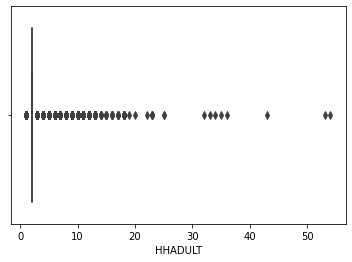

GENHLTH


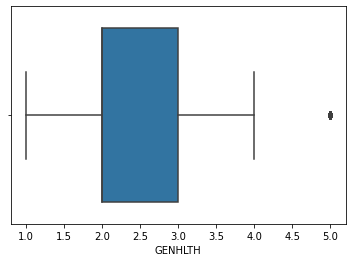

PHYSHLTH


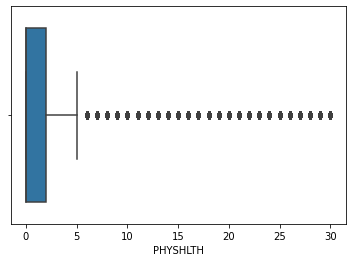

MENTHLTH


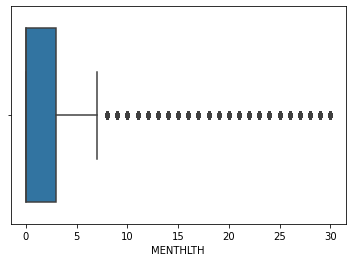

SLEPTIM1


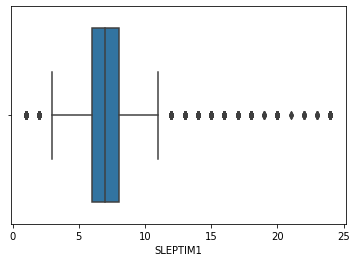

WEIGHT2


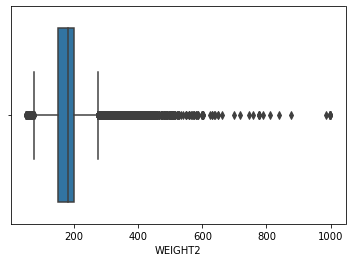

AVEDRNK3


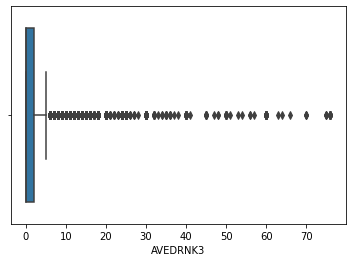

DRNK3GE5


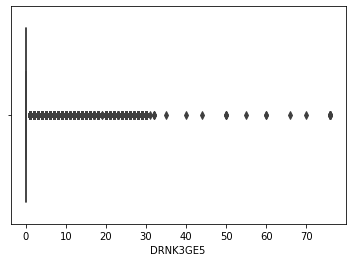

MARIJAN1


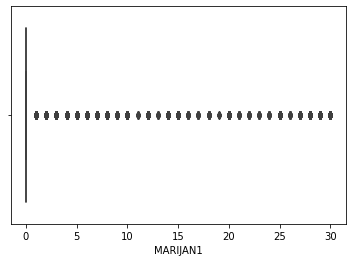

_AGE80


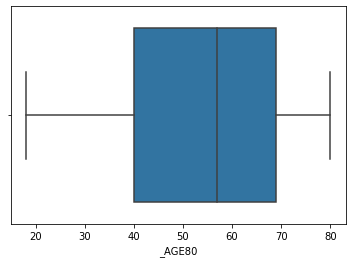

HTIN4


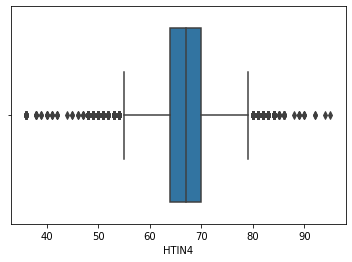

WTKG3


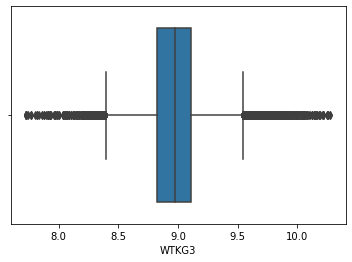

_BMI5


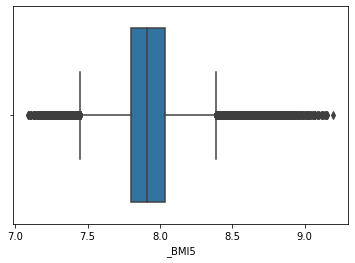

_INCOMG


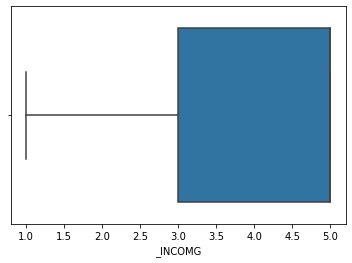

DROCDY3_


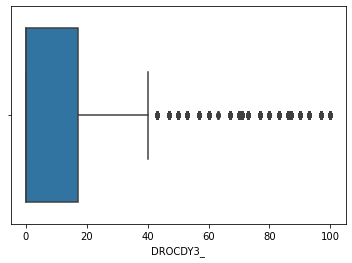

_DRNKWK1


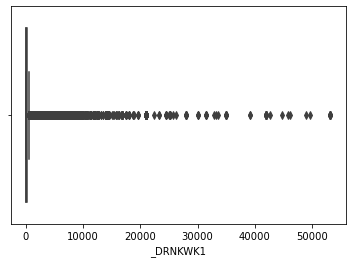

In [21]:
## Final boxplots of transformed and imputed data

for col in X_numeric:
    sns.boxplot(x=X_numeric[col])
    print(col)
    plt.show()

In [22]:
# Note that a few variables need to be converted correctly - to the right scale and so on
# They are 'WEIGHT2', 'AVEDRNK3', 'DROCDY3_', '_DRNKWK1'

In [23]:
# encoding the categoric data

X_categoric_encoded = pd.get_dummies(X_categoric.astype('object'), drop_first=True)

In [24]:
X_categoric_encoded.shape

(398387, 95)

In [25]:
## merging X_cat and X_num

X_full = pd.concat([X_categoric_encoded, X_numeric], axis=1)
X_full.shape

(398387, 111)

In [26]:
# Making a scaled version of dataset

from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
X_full_scaled = scale.fit_transform(X_full)

# Model Fitting

In [27]:
scorecard_details = ['Recall Score, pos=1', 'Accuracy', 'Cohen Kappa Score', 
                                       'Bias Error', 'Variance Error']

model_scorecard = pd.DataFrame(columns=scorecard_details)

In [28]:
# function to calculate bias and variance errors 

def calc_bias_variance_error(model):
    
    kf = KFold(n_splits=5)
    
    scores = cross_val_score(estimator=model, cv=kf, X=X_test, y=y_test, scoring='recall')
    
    bias_error = np.mean(1-scores)
    variance_error = np.std(scores, ddof=1)
    
    return bias_error, variance_error
    
# function to calculate the scorecard metrics
def calc_model_scores(model, X_test, y_test):
    
    y_test_preds = model.predict(X_test)
    y_test_prob_preds = model.predict_proba(X_test)
    
    # calculating recall
    recall = recall_score(y_test, y_test_preds, pos_label=1)
    
    # calculating accuracy
    accuracy = accuracy_score(y_test, y_test_preds)
    
    # calculating cohen_kappa
    cohen_kappa = cohen_kappa_score(y_test, y_test_preds)
    
    # calculating bias and variance error
    bias_error, variance_error = calc_bias_variance_error(model)
    
    return (recall, accuracy, cohen_kappa, bias_error, variance_error)
    
# function to print all the relevant performance metrics
def model_performance_reports(model, X_test, y_test):

    y_test_preds = model.predict(X_test)
    y_test_prob_preds = model.predict_proba(X_test)[:, 1]
    
    # printing confusion matrix
    print('\nConfusion Matrix')
    print(confusion_matrix(y_test, y_test_preds))
    
    # printing classification report
    print('\nClassification report')
    print(classification_report(y_test, y_test_preds))
    
    print('\nDistribution of probabilities for the response class')
    sns.displot(x=y_test_prob_preds, hue=y_test, kind='kde')
    plt.axvline(x=0.5, c='r')
    plt.show()
    
# function to update the scorecard (using validation dataset scores)
def update_scorecard(name, scores):
    
    global model_scorecard
    model_scorecard = model_scorecard.append(pd.Series(list(scores), index=scorecard_details, name=name))
    

## Base model fit - Tuned Random Forest

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_full_scaled, y, test_size=0.3, random_state=42, stratify=y)

kfold = KFold(n_splits=3, shuffle=True, random_state=42)
params = {'n_estimators': [20, 30, 50, 100], 'max_depth': [5, 8, 10]}

GS_rf = GridSearchCV(estimator=RandomForestClassifier(),
                    param_grid=params,
                    scoring='recall',
                    cv=kfold)

GS_rf.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 8, 10],
                         'n_estimators': [20, 30, 50, 100]},
             scoring='recall')

In [30]:
GS_rf.best_params_

{'max_depth': 10, 'n_estimators': 20}

In [31]:
rf_tuned = RandomForestClassifier(n_estimators=20, max_depth=10)
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=20)


Confusion Matrix
[[109198     70]
 [ 10092    157]]

Classification report
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96    109268
         1.0       0.69      0.02      0.03     10249

    accuracy                           0.91    119517
   macro avg       0.80      0.51      0.49    119517
weighted avg       0.90      0.91      0.88    119517


Distribution of probabilities for the response class


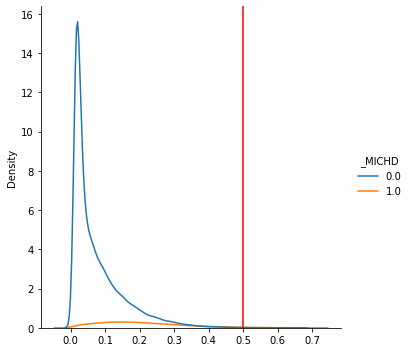

In [32]:
model_performance_reports(rf_tuned, X_test, y_test)

In [33]:
scores = calc_model_scores(rf_tuned, X_test, y_test)
update_scorecard('Random Forest', scores)
model_scorecard

,"Recall Score, pos=1",Accuracy,Cohen Kappa Score,Bias Error,Variance Error
Random Forest,0.015319,0.914974,0.026355,0.983602,0.004312


## Model 2: Naive Bayes

## Model 3: GS Tuned RF

## Model : AdaBoostClassifier with Decision Tree

## Model : AdaBoostClassifier with RF

In [67]:
rfc= RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)
y_pred_train = rfc.predict(X_train)
y_prob_train = rfc.predict_proba(X_train)[:,1]

y_pred_test = rfc.predict(X_test)
y_prob_test = rfc.predict_proba(X_test)[:,1]

print('Confusion Matrix-Train','\n',confusion_matrix(y_train,y_pred_train))
print('Accuracy-Train',accuracy_score(y_train,y_pred_train))
print('ROC-AUC-Test',roc_auc_score(y_train,y_prob_train))


print('Confusion Matrix-Test','\n',confusion_matrix(y_test,y_pred_test))
print('Accuracy-Train',accuracy_score(y_test,y_pred_test))
print('ROC-AUC-Test',roc_auc_score(y_test,y_prob_test))

Confusion Matrix-Train 
 [[254909      0]
 [    11  23950]]
Accuracy-Train 0.9999605550973572
ROC-AUC-Test 1.0
Confusion Matrix-Test 
 [[108997    318]
 [  9757    445]]
Accuracy-Train 0.9157023687006869
ROC-AUC-Test 0.8299953795248796


In [68]:
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV

In [69]:
params={'n_estimators':sp_randint(50,100),
       'max_features':sp_randint(1,15),
         'max_depth':sp_randint(2,10),
       'min_samples_leaf':sp_randint(10,50),
       'criterion':['gini','entropy']}
rsearch = RandomizedSearchCV(rfc,params,n_iter=100,cv=3,scoring='roc_auc',random_state=44)
rsearch.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000025FC1F9DA30>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000025FC1FD14F0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000025FC1FD1F70>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000025FC1F48D60>},
                   random_state=44, scoring='roc_auc')

In [70]:
rsearch.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 13,
 'min_samples_leaf': 37,
 'n_estimators': 99}


Confusion Matrix
[[108997    318]
 [  9757    445]]

Classification report
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96    109315
         1.0       0.58      0.04      0.08     10202

    accuracy                           0.92    119517
   macro avg       0.75      0.52      0.52    119517
weighted avg       0.89      0.92      0.88    119517


Distribution of probabilities for the response class


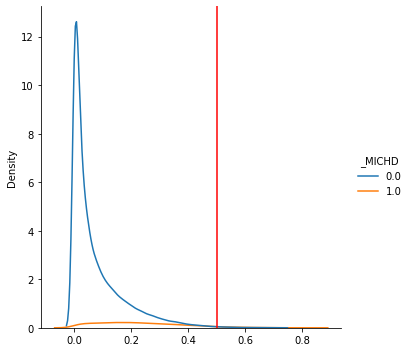

In [71]:
model_performance_reports(rfc, X_test, y_test)

## Model : Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegressionCV

X_train, X_test, y_train, y_test = train_test_split(X_full_scaled, y, random_state=42, test_size=0.3)

lr = LogisticRegressionCV(scoring='recall', max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegressionCV(max_iter=1000, scoring='recall')


Confusion Matrix
[[108278   1037]
 [  8987   1215]]

Classification report
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.96    109315
         1.0       0.54      0.12      0.20     10202

    accuracy                           0.92    119517
   macro avg       0.73      0.55      0.58    119517
weighted avg       0.89      0.92      0.89    119517


Distribution of probabilities for the response class


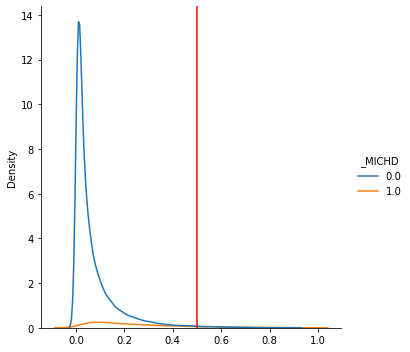

In [35]:
model_performance_reports(lr, X_test, y_test)

In [36]:
scores = calc_model_scores(lr, X_test, y_test)
update_scorecard('Logistic Regression', scores)
model_scorecard

,"Recall Score, pos=1",Accuracy,Cohen Kappa Score,Bias Error,Variance Error
Random Forest,0.015319,0.914974,0.026355,0.983602,0.004312
Logistic Regression,0.119094,0.916129,0.169479,0.882612,0.007003


## Model : GS Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

param_grid = {'C':[0.01, 0.05, 0.1, 0.5, 1.0, 2, 5, 10]}

GS_lr = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, scoring='recall', cv=5)
GS_lr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1.0, 2, 5, 10]},
             scoring='recall')

In [38]:
GS_lr.best_params_

{'C': 1.0}

In [39]:
# fit a new logistic model with the best parameters

lr_tuned = LogisticRegression(C=5)
lr_tuned.fit(X_train, y_train)

LogisticRegression(C=5)


Confusion Matrix
[[108278   1037]
 [  8987   1215]]

Classification report
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.96    109315
         1.0       0.54      0.12      0.20     10202

    accuracy                           0.92    119517
   macro avg       0.73      0.55      0.58    119517
weighted avg       0.89      0.92      0.89    119517


Distribution of probabilities for the response class


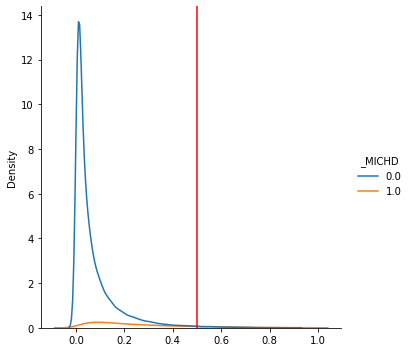

In [40]:
model_performance_reports(lr_tuned, X_test, y_test)

In [41]:
scores = calc_model_scores(lr_tuned, X_test, y_test)
update_scorecard('Logistic Regression, C=5', scores)
model_scorecard

,"Recall Score, pos=1",Accuracy,Cohen Kappa Score,Bias Error,Variance Error
Random Forest,0.015319,0.914974,0.026355,0.983602,0.004312
Logistic Regression,0.119094,0.916129,0.169479,0.882612,0.007003
"Logistic Regression, C=5",0.119094,0.916129,0.169479,0.882512,0.007134


## Model : XGBoost RF

## Model : XGBoost LR

## Model : LightGBM RF

In [43]:
!pip install lightgbm

In [47]:
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

In [55]:
params ={'n_estimators': sp_randint(50,250),
        'max_depth':sp_randint(1,15),
        'num_leaves':sp_randint(40,100),
        'learning_rate':sp_uniform(0,0.5)}

lgbc = lgb.LGBMClassifier(random_state=42)

rsearch = RandomizedSearchCV(lgbc,params,n_iter=50,cv=3,scoring='roc_auc')
rsearch.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=LGBMClassifier(random_state=42), n_iter=50,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000025F8547D3D0>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000025F86E562E0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000025FC1A8E3D0>,
                                        'num_leaves': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000025FA4C66B80>},
                   scoring='roc_auc')

In [56]:
rsearch.best_params_

{'learning_rate': 0.09262370327713587,
 'max_depth': 3,
 'n_estimators': 207,
 'num_leaves': 86}

In [59]:
lgbc= lgb.LGBMClassifier(**rsearch.best_params_,random_state=42)

lgbc.fit(X_train,y_train)
y_pred_train = lgbc.predict(X_train)
y_prob_train = lgbc.predict_proba(X_train)[:,1]

y_pred_test = lgbc.predict(X_test)
y_prob_test = lgbc.predict_proba(X_test)[:,1]

print('Confusion Matrix-Train','\n',confusion_matrix(y_train,y_pred_train))
print('Accuracy-Train',accuracy_score(y_train,y_pred_train))
print('ROC-AUC-Train',roc_auc_score(y_train,y_prob_train))

print('\n')
print('Confusion Matrix-Test','\n',confusion_matrix(y_test,y_pred_test))
print('Accuracy-Test',accuracy_score(y_test,y_pred_test))
print('ROC-AUC-Test',roc_auc_score(y_test,y_prob_test))

Confusion Matrix-Train 
 [[253340   1569]
 [ 21557   2404]]
Accuracy-Train 0.9170724710438556
ROC-AUC-Train 0.8511914604322042


Confusion Matrix-Test 
 [[108568    747]
 [  9219    983]]
Accuracy-Test 0.9166143728507241
ROC-AUC-Test 0.8449124743709072



Confusion Matrix
[[108568    747]
 [  9219    983]]

Classification report
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.96    109315
         1.0       0.57      0.10      0.16     10202

    accuracy                           0.92    119517
   macro avg       0.74      0.54      0.56    119517
weighted avg       0.89      0.92      0.89    119517


Distribution of probabilities for the response class


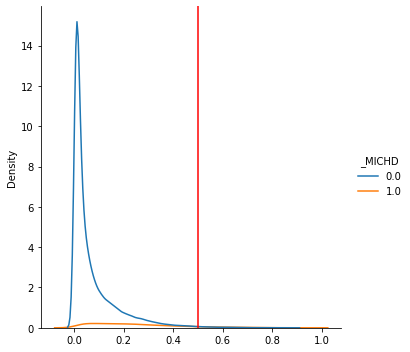

In [66]:
model_performance_reports(lgbc, X_test, y_test)

## Model : Gradient Boosting with RF